In [7]:
#pandas is a libary function this libary function is help to data manupalting etc..
import pandas as pd
#NumPy arrays can execute advanced mathematical operations with large data sets more efficiently and with less code than when using Python's built-in lists.
import numpy as np
#To given one varible the varible is store the file path
file_name='/content/customer_sentiment_analysis (1).xlsx'
#Is given another varible the varinle is call the file
#read_excel is built in functiuon this function helps to the exceell sheet read
#Change pd.read_csv to pd.read_excel to read an Excel file
df=pd.read_excel(file_name)
#and the data print
print(df)

   Customer_ID                                     Review_Text  Rating  \
0         1001           Amazing product! Highly recommend it.       5   
1         1002   The quality is poor and delivery was delayed.       2   
2         1003        Average experience. Nothing exceptional.       3   
3         1004           Fantastic service and quick delivery!       5   
4         1005  Received a damaged product. Very disappointed.       1   

  Sentiment Country        State         City Product_Category   Timestamp  
0  Positive     USA   California  Los Angeles      Electronics  2024-06-15  
1  Negative     USA        Texas      Houston          Fashion  2024-06-14  
2   Neutral   India  Maharashtra       Mumbai  Home Appliances  2024-06-13  
3  Positive   India        Delhi    New Delhi            Books  2024-06-12  
4  Negative  Canada      Ontario      Toronto             Toys  2024-06-11  


Load the dataset into a Pandas DataFrame, ensuring it contains columns for country, state, city, review text, review rating, and other metadata.

In [8]:
# prompt: Load the dataset into a Pandas DataFrame, ensuring it contains columns for country, state, city, review text, review rating, and other metadata.

# Assuming the Excel file has columns that can be mapped to the required fields.
# Adjust column names as needed to match your Excel file's actual column headers.

#If the file is not in the /content directory, change the path accordingly.
try:
    df = pd.read_excel('/content/customer_sentiment_analysis (1).xlsx')

    #Check if required columns exist, create them with NaN if they don't
    required_columns = ['country', 'state', 'city', 'review text', 'review rating']
    for col in required_columns:
        if col not in df.columns:
            df[col] = np.nan

    # Display the first few rows to verify
    print(df.head())

except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

   Customer_ID                                     Review_Text  Rating  \
0         1001           Amazing product! Highly recommend it.       5   
1         1002   The quality is poor and delivery was delayed.       2   
2         1003        Average experience. Nothing exceptional.       3   
3         1004           Fantastic service and quick delivery!       5   
4         1005  Received a damaged product. Very disappointed.       1   

  Sentiment Country        State         City Product_Category   Timestamp  \
0  Positive     USA   California  Los Angeles      Electronics  2024-06-15   
1  Negative     USA        Texas      Houston          Fashion  2024-06-14   
2   Neutral   India  Maharashtra       Mumbai  Home Appliances  2024-06-13   
3  Positive   India        Delhi    New Delhi            Books  2024-06-12   
4  Negative  Canada      Ontario      Toronto             Toys  2024-06-11   

   country  state  city  review text  review rating  
0      NaN    NaN   NaN         

Create dropdown filters for country, state, and city to subset the data dynamically.

In [14]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the data
file_path = '/content/customer_sentiment_analysis (1).xlsx'
sheet_name = 'Sheet1'  # Update if your sheet name is different
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract unique values for dropdowns
countries = ['All'] + sorted(df['Country'].dropna().unique().tolist())
states = ['All']
cities = ['All']

# Create widgets for filtering
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
state_dropdown = widgets.Dropdown(options=states, description='State:')
city_dropdown = widgets.Dropdown(options=cities, description='City:')
output = widgets.Output()

# Function to update states based on selected country
def update_states(*args):
    selected_country = country_dropdown.value
    if selected_country == 'All':
        filtered_states = df['State'].dropna().unique().tolist()
    else:
        filtered_states = df[df['Country'] == selected_country]['State'].dropna().unique().tolist()
    state_dropdown.options = ['All'] + sorted(filtered_states)
    state_dropdown.value = 'All'
    update_cities()  # Reset cities when states are updated

# Function to update cities based on selected state
def update_cities(*args):
    selected_country = country_dropdown.value
    selected_state = state_dropdown.value

    if selected_state == 'All':
        if selected_country == 'All':
            filtered_cities = df['City'].dropna().unique().tolist()
        else:
            filtered_cities = df[df['Country'] == selected_country]['City'].dropna().unique().tolist()
    else:
        filtered_cities = df[df['State'] == selected_state]['City'].dropna().unique().tolist()

    city_dropdown.options = ['All'] + sorted(filtered_cities)
    city_dropdown.value = 'All'

# Function to display filtered data
def filter_data(*args):
    with output:
        clear_output()
        filtered_df = df.copy()

        if country_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Country'] == country_dropdown.value]
        if state_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['State'] == state_dropdown.value]
        if city_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['City'] == city_dropdown.value]

        display(filtered_df)

# Observe changes in dropdowns
country_dropdown.observe(update_states, names='value')
state_dropdown.observe(update_cities, names='value')
country_dropdown.observe(filter_data, names='value')
state_dropdown.observe(filter_data, names='value')
city_dropdown.observe(filter_data, names='value')

# Display widgets and output
display(country_dropdown, state_dropdown, city_dropdown, output)

# Initialize dropdowns
update_states()


Dropdown(description='Country:', options=('All', 'Canada', 'India', 'USA'), value='All')

Dropdown(description='State:', options=('All',), value='All')

Dropdown(description='City:', options=('All',), value='All')

Output()

Perform initial inspection:

o Print column names, data types, and descriptive statistics.

o Check for missing values and duplicates in the entire dataset and subsets.

o Summarize review sentiment distribution (target variable) for the overall data and selected subsets.

In [17]:
# prompt: Perform initial inspection:
# o Print column names, data types, and descriptive statistics.
# o Check for missing values and duplicates in the entire dataset and subsets.
# o Summarize review sentiment distribution (target variable) for the overall data and selected subsets.

# Print column names, data types, and descriptive statistics
print(df.info())
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:\n", df.duplicated().sum())

# Summarize review sentiment distribution
print("\nReview Sentiment Distribution:\n", df['Rating'].value_counts())

# Example: Subset by country
country_subset = df[df['Country'] == 'United States']  # Replace 'United States' with the desired country
print("\nReview Sentiment Distribution (United States):\n", country_subset['Rating'].value_counts())

# Example: Subset by state (within a country)
state_subset = country_subset[country_subset['State'] == 'California']  # Replace 'California' with the desired state
print("\nReview Sentiment Distribution (California, USA):\n", state_subset['Rating'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_ID       5 non-null      int64 
 1   Review_Text       5 non-null      object
 2   Rating            5 non-null      int64 
 3   Sentiment         5 non-null      object
 4   Country           5 non-null      object
 5   State             5 non-null      object
 6   City              5 non-null      object
 7   Product_Category  5 non-null      object
 8   Timestamp         5 non-null      object
dtypes: int64(2), object(7)
memory usage: 488.0+ bytes
None
        Customer_ID                            Review_Text    Rating  \
count      5.000000                                      5  5.000000   
unique          NaN                                      5       NaN   
top             NaN  Amazing product! Highly recommend it.       NaN   
freq            NaN                           

1. Handle missing values:

o Impute numerical columns with mean or median based on selected regions.

o Drop rows with missing review text.

In [23]:
def handle_missing_values(df, selected_regions):
    # Impute numerical columns based on selected regions
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        for region in selected_regions:
            # Example: Impute with mean for the selected region
            # The line below was changed to use 'region' instead of 'Country'
            mean_val = df[df['Country'] == region][col].mean()  # Assuming you have a 'region' column
            df.loc[(df['Country'] == region) & (df[col].isnull()), col] = mean_val

    # Drop rows with missing review text
    df.dropna(subset=['Review_Text'], inplace=True)
    return df

# Example usage after filtering data:
# Assuming you've already applied the filtering based on country, state, and city
filtered_df = df.copy() # make sure that df is the correct dataframe

# Define selected regions
selected_regions = ['Region1', 'Region2'] # Replace with your region names


# Call the function to handle missing values in the filtered data.
filtered_df = handle_missing_values(filtered_df, selected_regions)

# Now filtered_df has handled missing values
print("\nDataframe after handling missing values:\n", filtered_df.head())


Dataframe after handling missing values:
    Customer_ID                                     Review_Text  Rating  \
0       1001.0           Amazing product! Highly recommend it.     5.0   
1       1002.0   The quality is poor and delivery was delayed.     2.0   
2       1003.0        Average experience. Nothing exceptional.     3.0   
3       1004.0           Fantastic service and quick delivery!     5.0   
4       1005.0  Received a damaged product. Very disappointed.     1.0   

  Sentiment Country        State         City Product_Category   Timestamp  
0  Positive     USA   California  Los Angeles      Electronics  2024-06-15  
1  Negative     USA        Texas      Houston          Fashion  2024-06-14  
2   Neutral   India  Maharashtra       Mumbai  Home Appliances  2024-06-13  
3  Positive   India        Delhi    New Delhi            Books  2024-06-12  
4  Negative  Canada      Ontario      Toronto             Toys  2024-06-11  


Remove duplicate rows globally and within geo-specific subset

In [26]:
# prompt: Remove duplicate rows globally and within geo-specific subset

def remove_duplicate_rows(df):
    # Remove global duplicates
    df_no_global_duplicates = df.drop_duplicates()

    # Remove duplicates within each geo-specific subset
    df_no_geo_duplicates = df_no_global_duplicates.copy()
    for geo_level in ['Country', 'State', 'City']:  # Process each geo level
        df_no_geo_duplicates = df_no_geo_duplicates.drop_duplicates(subset=[geo_level, 'Review_Text', 'Rating'], keep='first')

    return df_no_geo_duplicates

# Example usage (assuming 'df' is your DataFrame)
df = remove_duplicate_rows(df)
df

,Customer_ID,Review_Text,Rating,Sentiment,Country,State,City,Product_Category,Timestamp
0,1001,Amazing product! Highly recommend it.,5,Positive,USA,California,Los Angeles,Electronics,2024-06-15
1,1002,The quality is poor and delivery was delayed.,2,Negative,USA,Texas,Houston,Fashion,2024-06-14
2,1003,Average experience. Nothing exceptional.,3,Neutral,India,Maharashtra,Mumbai,Home Appliances,2024-06-13
3,1004,Fantastic service and quick delivery!,5,Positive,India,Delhi,New Delhi,Books,2024-06-12
4,1005,Received a damaged product. Very disappointed.,1,Negative,Canada,Ontario,Toronto,Toys,2024-06-11


Preprocess text data:

o Tokenize review text and remove stopwords, punctuation, and numbers.

o Convert text to lowercase and apply stemming/lemmatization.

In [28]:
# prompt: . Preprocess text data:
# o Tokenize review text and remove stopwords, punctuation, and numbers.
# o Convert text to lowercase and apply stemming/lemmatization.

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download the 'punkt_tab' data for tokenization
nltk.download('punkt_tab')  # This line is added to download the required data

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords, punctuation, and numbers
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation and not token.isdigit()]

    # Apply stemming or lemmatization
    # stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # return " ".join(stemmed_tokens) # or return " ".join(lemmatized_tokens)
    return " ".join(lemmatized_tokens)

# Example usage (assuming 'df' is your DataFrame and 'Review_Text' is your text column)
df['processed_review'] = df['Review_Text'].apply(preprocess_text)

print(df[['Review_Text', 'processed_review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                      Review_Text  \
0           Amazing product! Highly recommend it.   
1   The quality is poor and delivery was delayed.   
2        Average experience. Nothing exceptional.   
3           Fantastic service and quick delivery!   
4  Received a damaged product. Very disappointed.   

                         processed_review  
0        amazing product highly recommend  
1           quality poor delivery delayed  
2  average experience nothing exceptional  
3        fantastic service quick delivery  
4   received damaged product disappointed  


Validate cleaned data integrity across filters.

In [30]:
# prompt: Validate cleaned data integrity across filters.

def validate_data_integrity(df):
    """
    Validates data integrity across filters, checking for inconsistencies after filtering operations.

    Args:
        df: The pandas DataFrame to validate.  Assumes it has been filtered.

    Returns:
        A dictionary summarizing the validation results.
    """
    results = {}

    # 1. Check for Missing Values after filtering
    missing_values = df.isnull().sum()
    results["missing_values"] = missing_values

    # 2. Check for Duplicates after filtering
    duplicate_rows = df.duplicated().sum()
    results["duplicate_rows"] = duplicate_rows

    # 3. Review Sentiment Distribution after filtering (if applicable)
    if 'Rating' in df.columns:  # Check if the rating column exists
        sentiment_distribution = df['Rating'].value_counts()
        results["sentiment_distribution"] = sentiment_distribution
    else:
        results["sentiment_distribution"] = "Rating column not found."

    # 4.  Check for empty strings in the processed review column
    empty_strings = df[df['Review_Text'].str.strip() == ''].shape[0]
    results['empty_processed_reviews'] = empty_strings


    # Add more validation checks as needed (e.g., data type consistency, range checks)

    return results

# Example usage after filtering:
# Assuming 'filtered_df' is your DataFrame after applying filters
validation_results = validate_data_integrity(filtered_df)
validation_results

{'missing_values': Customer_ID         0
 Review_Text         0
 Rating              0
 Sentiment           0
 Country             0
 State               0
 City                0
 Product_Category    0
 Timestamp           0
 dtype: int64,
 'duplicate_rows': 0,
 'sentiment_distribution': Rating
 5.0    2
 2.0    1
 3.0    1
 1.0    1
 Name: count, dtype: int64,
 'empty_processed_reviews': 0}

Analyze review characteristics:

o Plot review length distribution globally and by region.

o Generate word clouds for each sentiment category (global and filtered).

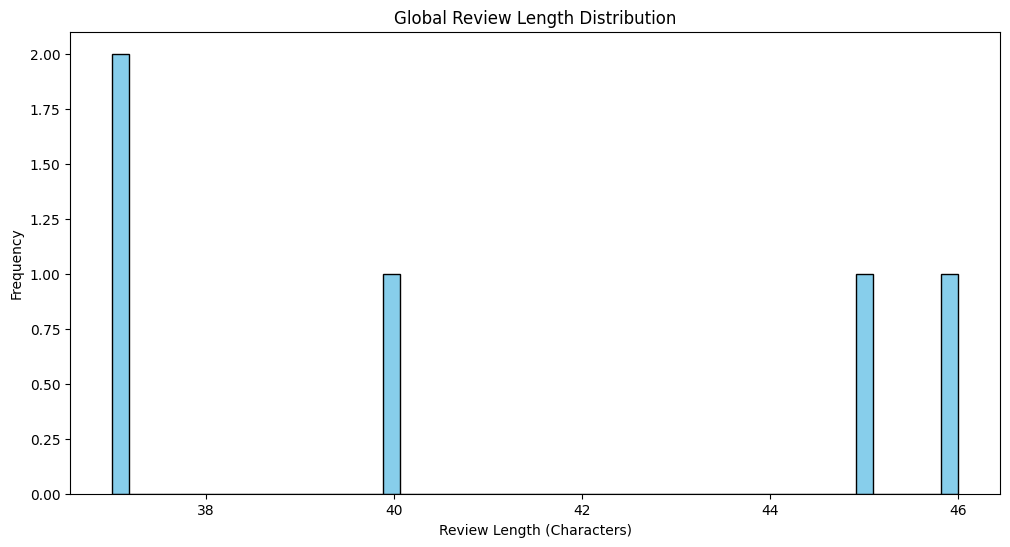

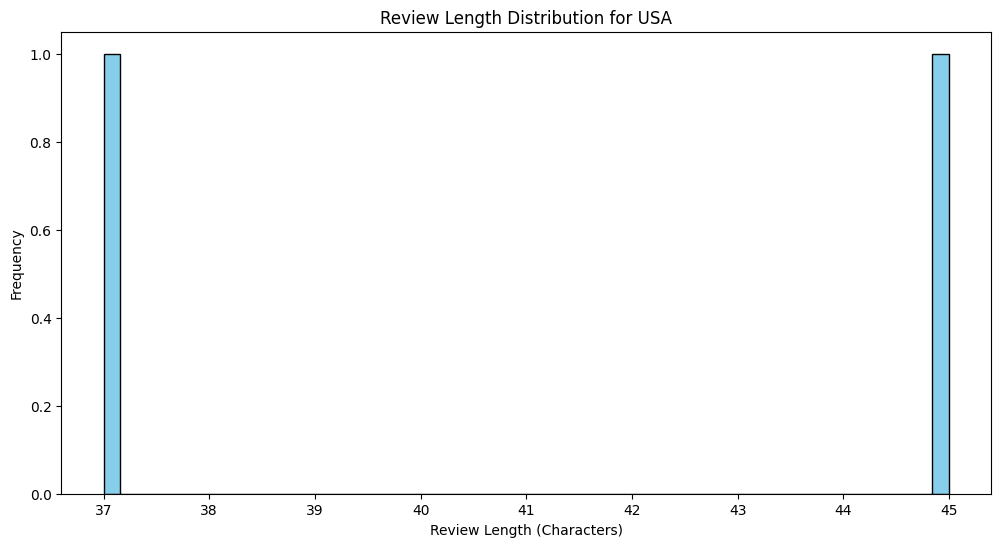

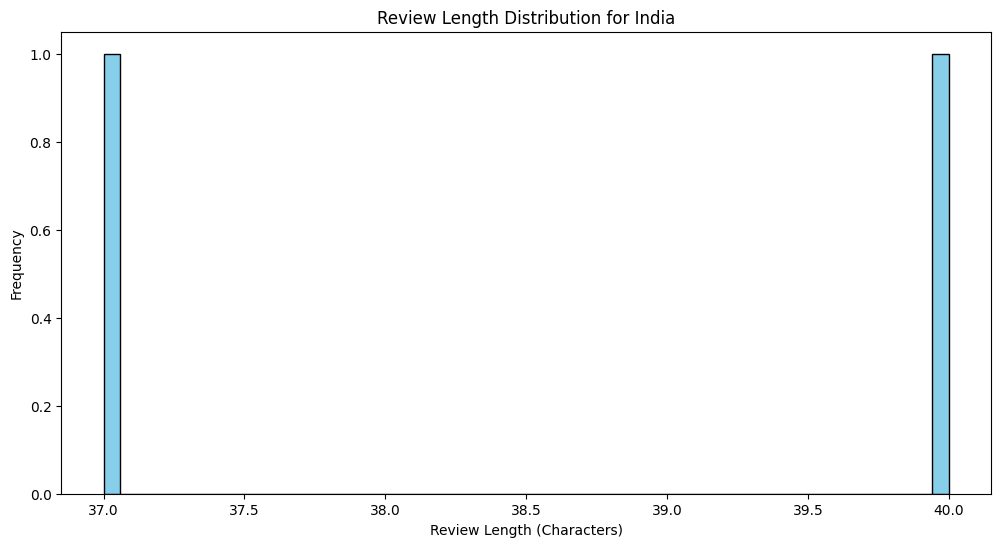

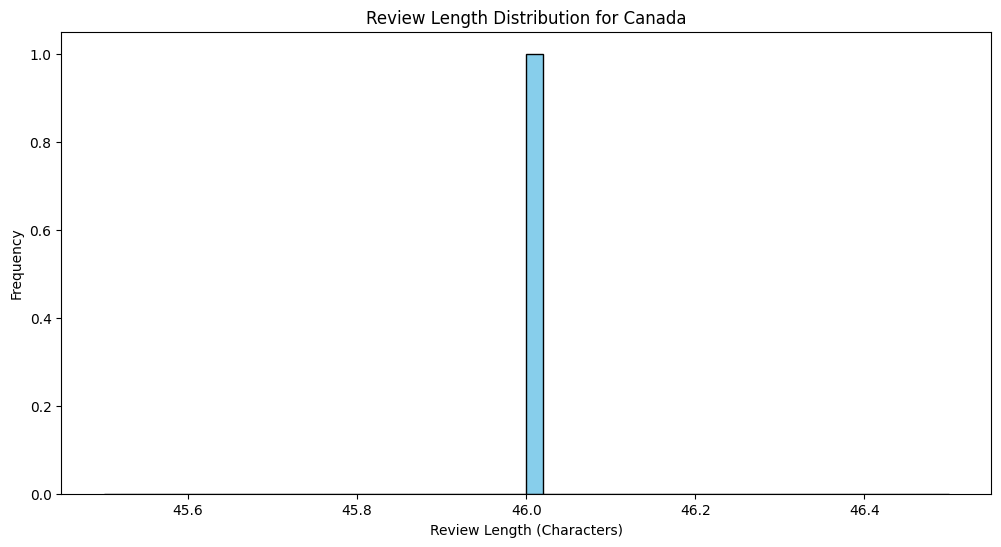

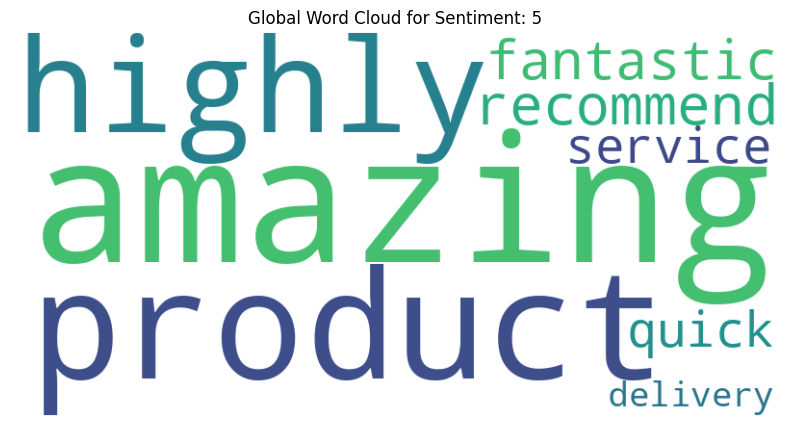

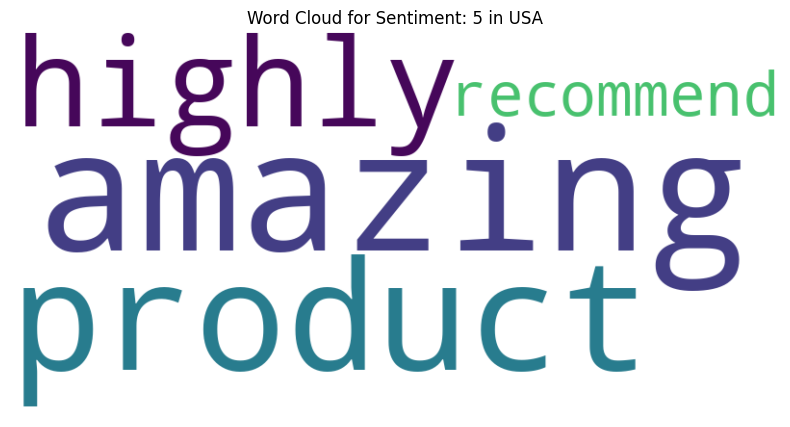

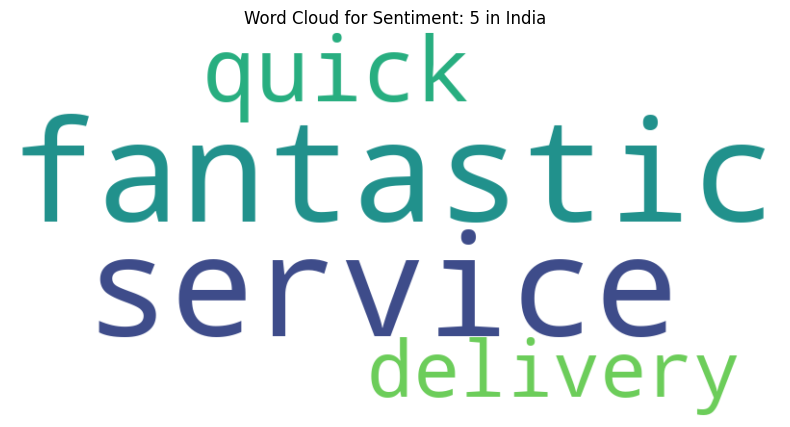

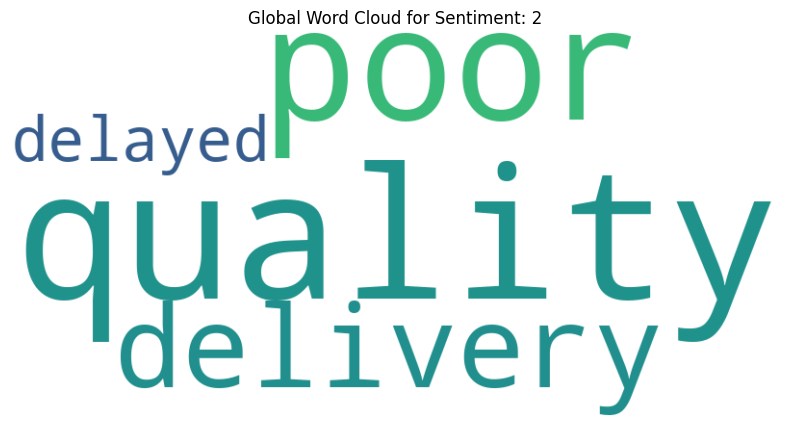

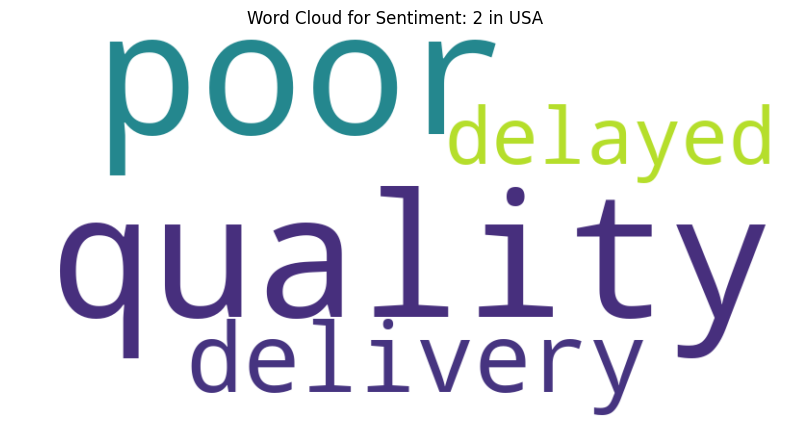

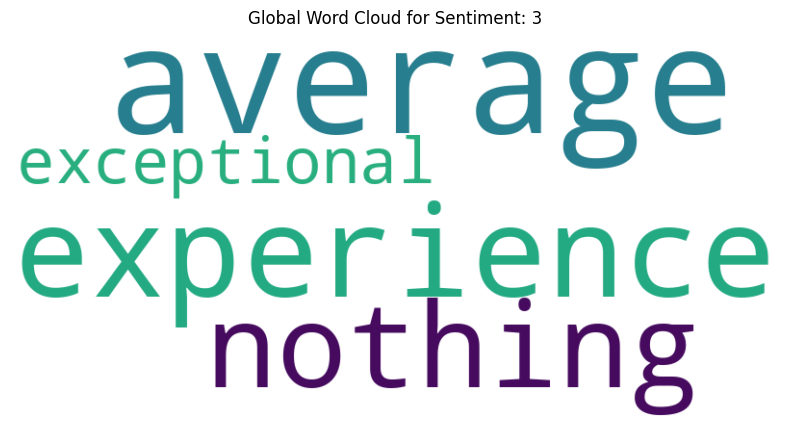

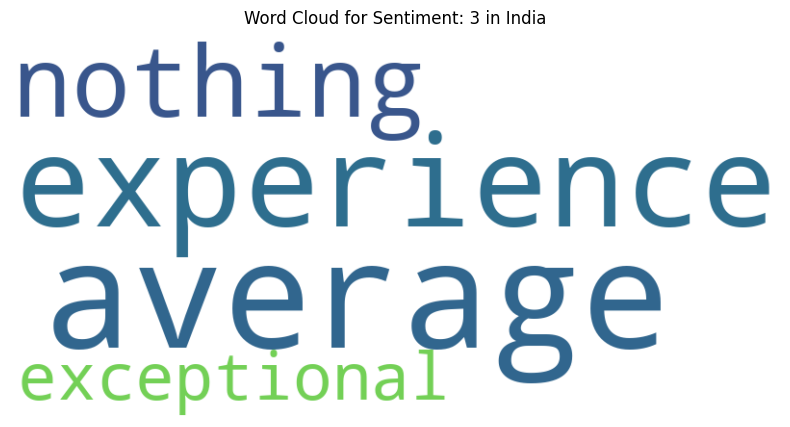

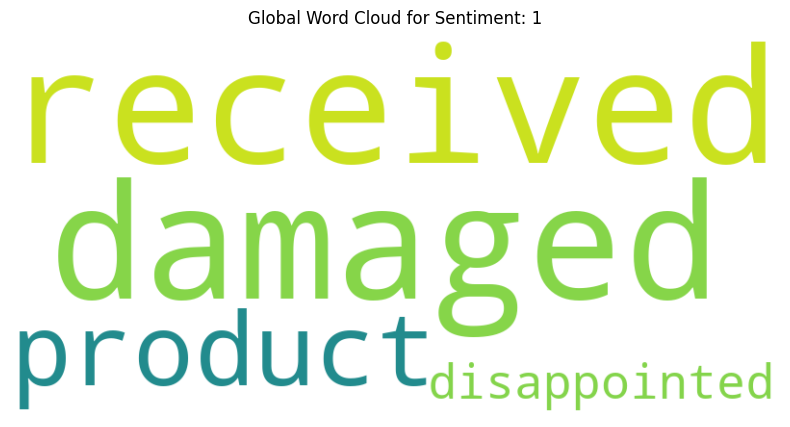

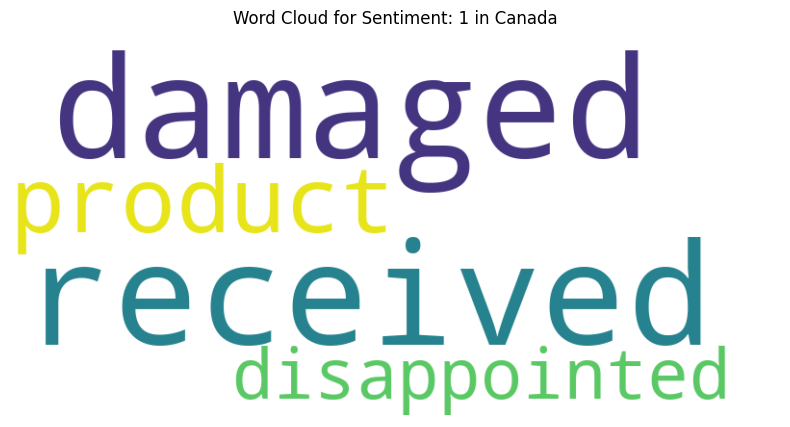

In [31]:
# prompt: Analyze review characteristics:
# o Plot review length distribution globally and by region.
# o Generate word clouds for each sentiment category (global and filtered).

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (Your existing code) ...

def analyze_review_characteristics(df):
    """
    Analyzes review characteristics, plotting review length distribution and generating word clouds.
    """

    # 1. Review Length Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['Review_Text'].str.len(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Global Review Length Distribution')
    plt.xlabel('Review Length (Characters)')
    plt.ylabel('Frequency')
    plt.show()


    for region in df['Country'].unique():
        region_df = df[df['Country'] == region]
        plt.figure(figsize=(12, 6))
        plt.hist(region_df['Review_Text'].str.len(), bins=50, color='skyblue', edgecolor='black')
        plt.title(f'Review Length Distribution for {region}')
        plt.xlabel('Review Length (Characters)')
        plt.ylabel('Frequency')
        plt.show()


    # 2. Word Clouds
    for sentiment in df['Rating'].unique():  # Assuming 'Rating' represents sentiment
        sentiment_df = df[df['Rating'] == sentiment]
        text = " ".join(review for review in sentiment_df['processed_review'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Global Word Cloud for Sentiment: {sentiment}')
        plt.show()

        for region in df['Country'].unique():
            region_sentiment_df = sentiment_df[sentiment_df['Country'] == region]
            if not region_sentiment_df.empty:  # Check if the subset is not empty
                text = " ".join(review for review in region_sentiment_df['processed_review'])
                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis("off")
                plt.title(f'Word Cloud for Sentiment: {sentiment} in {region}')
                plt.show()


# Example usage:
analyze_review_characteristics(df)

Visualize frequently occurring terms and phrases across regions, focusing on negative reviews.

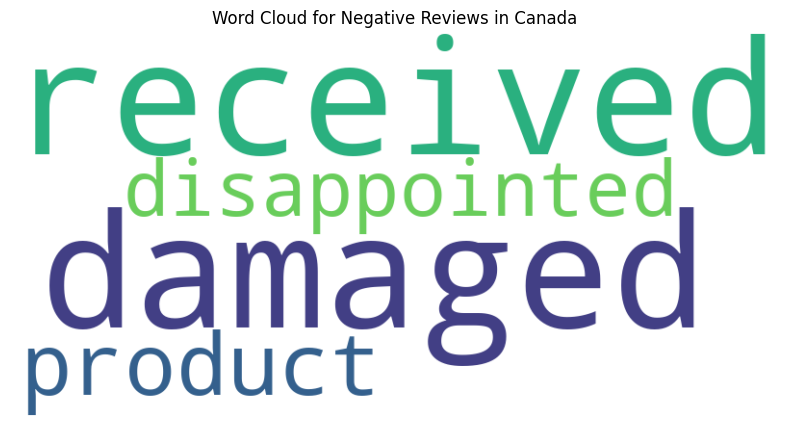

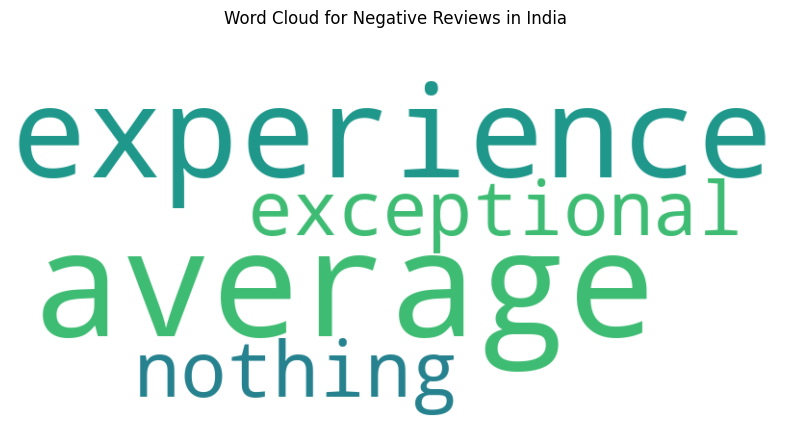

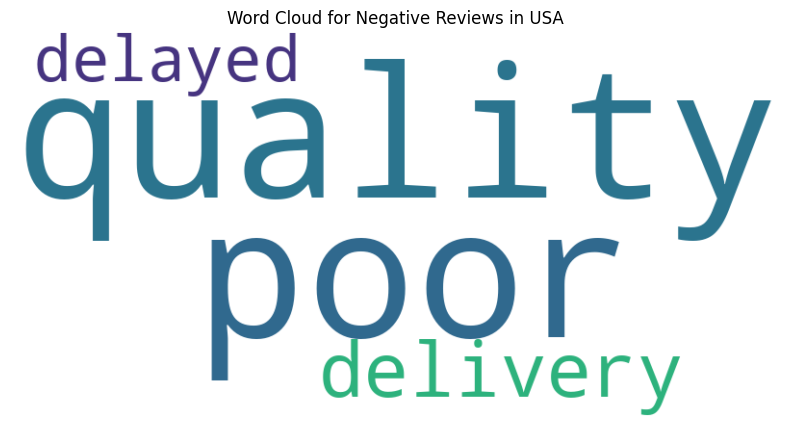

In [32]:
# prompt: Visualize frequently occurring terms and phrases across regions, focusing on negative reviews.

def visualize_negative_reviews(df):
    """
    Visualizes frequently occurring terms and phrases in negative reviews across regions.
    """
    # Filter for negative reviews (adjust the threshold as needed)
    negative_reviews = df[df['Rating'] <= 3]  # Example: Ratings 1, 2, and 3 are considered negative

    # Group by region and concatenate review texts
    region_reviews = negative_reviews.groupby('Country')['processed_review'].apply(lambda x: ' '.join(x))

    # Generate word clouds for each region
    for region, text in region_reviews.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Negative Reviews in {region}')
        plt.show()

# Example usage
visualize_negative_reviews(df)

Geo-specific numerical features:

o Review length (word count).

o Sentiment polarity using TextBlob or VADER.

In [33]:
# prompt: Geo-specific numerical features:
# o Review length (word count).
# o Sentiment polarity using TextBlob or VADER.

from textblob import TextBlob

def add_geo_features(df):
    # Review length
    df['review_length'] = df['Review_Text'].astype(str).apply(len)

    # Sentiment polarity using TextBlob
    df['sentiment_polarity'] = df['Review_Text'].astype(str).apply(lambda text: TextBlob(text).sentiment.polarity)

    return df

# Example usage assuming 'df' is your DataFrame
df = add_geo_features(df)
print(df[['Review_Text', 'review_length', 'sentiment_polarity']].head())

                                      Review_Text  review_length  \
0           Amazing product! Highly recommend it.             37   
1   The quality is poor and delivery was delayed.             45   
2        Average experience. Nothing exceptional.             40   
3           Fantastic service and quick delivery!             37   
4  Received a damaged product. Very disappointed.             46   

   sentiment_polarity  
0            0.455000  
1           -0.400000  
2            0.258333  
3            0.408333  
4           -0.975000  


Advanced text representation:

o Apply TF-IDF vectorization.

o Integrate bi-grams or tri-grams to capture context.

In [34]:
# prompt: Advanced text representation:
# o Apply TF-IDF vectorization.
# o Integrate bi-grams or tri-grams to capture context.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer with n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Includes unigrams, bigrams, and trigrams

# Fit and transform the 'processed_review' column
tfidf_matrix = vectorizer.fit_transform(df['processed_review'])

# The 'tfidf_matrix' now contains the TF-IDF representation of your text data
# You can access the feature names (words and n-grams) using vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names_out()

# Example: Print the first 10 feature names
print(feature_names[:10])

# You can now use the tfidf_matrix for further analysis, such as clustering or classification

['amazing' 'amazing product' 'amazing product highly' 'average'
 'average experience' 'average experience nothing' 'damaged'
 'damaged product' 'damaged product disappointed' 'delayed']


Create regional sentiment features:

o Average rating and sentiment polarity for each country/state/city.

In [35]:
# prompt: Create regional sentiment features:
# o Average rating and sentiment polarity for each country/state/city.

# Group data by country, state, and city and calculate average rating and sentiment polarity
def create_regional_sentiment_features(df):
    regional_sentiment = df.groupby(['Country', 'State', 'City']).agg(
        average_rating=('Rating', 'mean'),
        average_polarity=('sentiment_polarity', 'mean')
    ).reset_index()
    return regional_sentiment

regional_sentiment_df = create_regional_sentiment_features(df)
regional_sentiment_df

,Country,State,City,average_rating,average_polarity
0,Canada,Ontario,Toronto,1.0,-0.975000
1,India,Delhi,New Delhi,5.0,0.408333
2,India,Maharashtra,Mumbai,3.0,0.258333
3,USA,California,Los Angeles,5.0,0.455000
4,USA,Texas,Houston,2.0,-0.400000


1. Compute correlations for numerical features across regions.

2. Perform feature selection using Recursive Feature Elimination (RFE) or PCA, considering geo-specific impacts.

3. Provide a heatmap of correlations and important features.

Correlations:
                             Customer_ID  Rating  review_length  \
Country                                                          
Canada  Customer_ID                 NaN     NaN            NaN   
        Rating                      NaN     NaN            NaN   
        review_length               NaN     NaN            NaN   
        sentiment_polarity          NaN     NaN            NaN   
India   Customer_ID                 1.0     1.0           -1.0   
        Rating                      1.0     1.0           -1.0   
        review_length              -1.0    -1.0            1.0   
        sentiment_polarity          1.0     1.0           -1.0   
USA     Customer_ID                 1.0    -1.0            1.0   
        Rating                     -1.0     1.0           -1.0   
        review_length               1.0    -1.0            1.0   
        sentiment_polarity         -1.0     1.0           -1.0   

                            sentiment_polarity  
Country    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


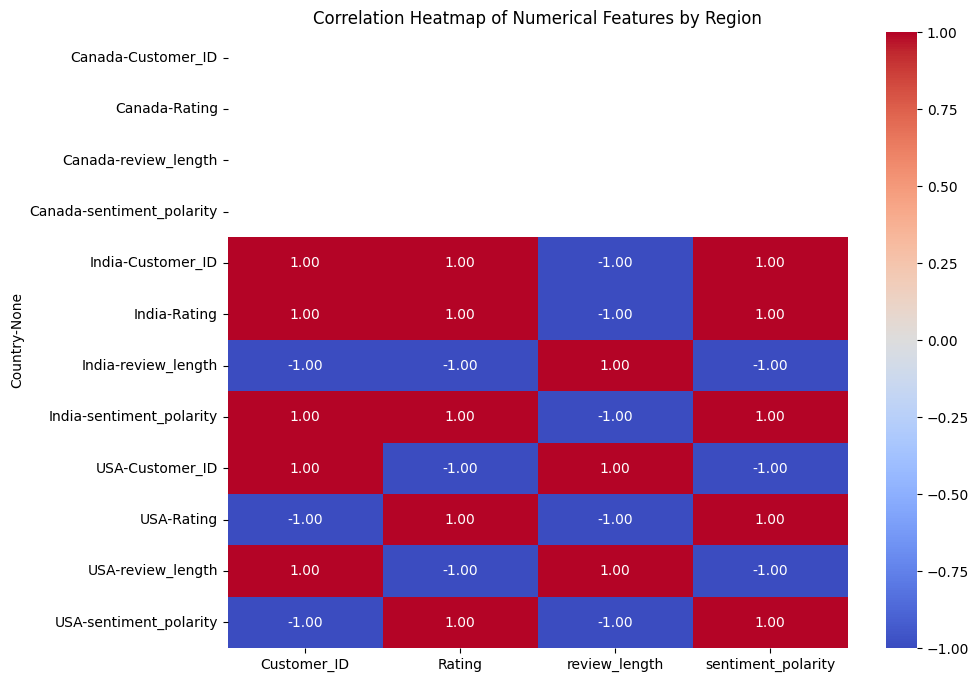

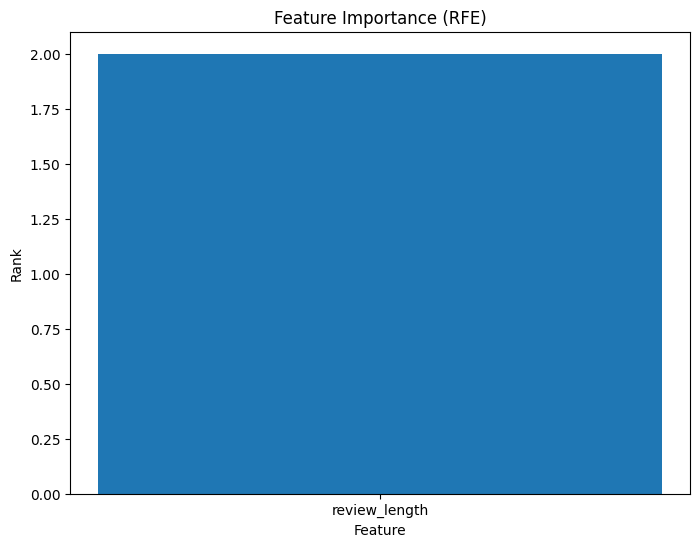

In [38]:
# prompt: 1. Compute correlations for numerical features across regions.
# 2. Perform feature selection using Recursive Feature Elimination (RFE) or PCA, considering geo-specific impacts.
# 3. Provide a heatmap of correlations and important features.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # Or another suitable model
from sklearn.decomposition import PCA

# ... (Your existing code) ...

# 1. Compute correlations for numerical features across regions
def compute_correlations(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    correlations = df.groupby('Country')[numerical_features].corr()
    return correlations

correlations = compute_correlations(df)
print("Correlations:\n", correlations)

# 2. Perform feature selection (RFE example)
def perform_feature_selection(df, target_column='Rating'):
    # Prepare data for RFE (replace with your actual features)
    X = df[['review_length', 'sentiment_polarity']]
    y = df[target_column]

    # Initialize RFE with a suitable estimator
    estimator = LogisticRegression()  # or any other classifier
    selector = RFE(estimator, n_features_to_select=1, step=1) # Select top feature

    # Fit RFE
    selector = selector.fit(X, y)

    # Get selected features and rankings
    selected_features = X.columns[selector.support_]
    feature_rankings = selector.ranking_
    return selected_features, feature_rankings

selected_features, feature_rankings = perform_feature_selection(df)
print("Selected Features:", selected_features)
print("Feature Rankings:", feature_rankings)

#Alternative using PCA
def perform_pca(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    X = df[numerical_features]
    pca = PCA(n_components=2) # Reduce to 2 principal components
    principal_components = pca.fit_transform(X)
    return principal_components, pca.explained_variance_ratio_

principal_components, explained_variance_ratio = perform_pca(df)
print("Principal Components", principal_components)
print("Explained Variance Ratio", explained_variance_ratio)


# 3. Visualize correlations and important features
def visualize_results(correlations, selected_features):
    # Heatmap of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features by Region')
    plt.show()

    # Bar plot of feature importance
    plt.figure(figsize=(8, 6))
    plt.bar(selected_features, feature_rankings)
    plt.title('Feature Importance (RFE)')
    plt.xlabel('Feature')
    plt.ylabel('Rank')
    plt.show()

visualize_results(correlations, selected_features)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the data
file_path = '/content/customer_sentiment_analysis (1).xlsx'
sheet_name = 'Sheet1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Fill missing values and process the data
df = df.dropna(subset=['Country', 'State', 'City'])  # Drop rows with missing geo-data
target_column = 'Sentiment'  # Assuming sentiment is the target variable
features = [col for col in df.columns if col not in ['Sentiment', 'Country', 'State', 'City']]

# Split the dataset into features (X) and target (y)
X = df[features]
y = df[target_column]

# Split full dataset for general training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a base model for hyperparameter tuning
base_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning using GridSearchCV
print("Performing Hyperparameter Tuning...")
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Hyperparameter tuning using GridSearchCV
print("Performing Hyperparameter Tuning...")
# Change cv to a value less than or equal to the number of samples in the smallest class
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')  # cv=3 or cv=4

grid_search.fit(X_train, y_train)

# Best Model after Hyperparameter Tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the full test set
y_pred_full = best_model.predict(X_test)
print("\nPerformance on Full Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full))

# --- Adapt the Model to Geo-Specific Subsets ---
geo_columns = ['Country', 'State', 'City']
geo_level = 'Country'  # You can change this to 'State' or 'City'

print(f"\n--- Geo-Specific Performance by {geo_level} ---")
geo_groups = df[geo_level].unique()

for group in geo_groups:
    print(f"\nEvaluating Performance for {geo_level}: {group}")
    subset = df[df[geo_level] == group]

    if subset.shape[0] < 10:  # Skip small subsets
        print(f"Skipping {group} due to insufficient data.")
        continue

    X_geo = subset[features]
    y_geo = subset[target_column]

    X_geo_train, X_geo_test, y_geo_train, y_geo_test = train_test_split(X_geo, y_geo, test_size=0.2, random_state=42)

    # Train and evaluate on geo-specific data
    best_model.fit(X_geo_train, y_geo_train)
    y_geo_pred = best_model.predict(X_geo_test)

    print(f"Accuracy for {group}: {accuracy_score(y_geo_test, y_geo_pred):.2f}")
    print(classification_report(y_geo_test, y_geo_pred))


Performing Hyperparameter Tuning...
Performing Hyperparameter Tuning...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target
X = df[['Rating', 'Timestamp', 'Price', 'Review_Text', 'Country', 'State', 'City']]  # Example features
y = df['Sentiment']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize the importance of features
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Negative Sentiment')
plt.show()


NameError: name 'df' is not defined

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame first
# Replace 'your_file.xlsx' with your actual file path
df = pd.read_excel('/content/customer_sentiment_analysis (1) (1).xlsx') # Assuming your data is in 'your_file.xlsx'

# Prepare features and target
X = df[['Rating', 'Timestamp', 'Price', 'Review_Text', 'Country', 'State', 'City']]  # Example features
y = df['Sentiment']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize the importance of features
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Negative Sentiment')
plt.show()

KeyError: "['Price'] not in index"

Model interpretability using SHAP or LIME for global and regional datasets.

2. Highlight critical features influencing predictions at a regional level.

3. Build a dynamic dashboard using Plotly or Streamlit for real-time geo-filtering and insights

In [5]:
# prompt: Model interpretability using SHAP or LIME for global and regional datasets.
# 2. Highlight critical features influencing predictions at a regional level.
# 3. Build a dynamic dashboard using Plotly or Streamlit for real-time geo-filtering and insights

import shap

# Assuming 'best_model' is your trained model and 'X_test' are your test features
explainer = shap.TreeExplainer(best_model) # or shap.Explainer for other models
shap_values = explainer.shap_values(X_test)

# Global Interpretation
shap.summary_plot(shap_values, X_test, plot_type="bar") # Bar plot for feature importance

# Regional Interpretation
# Group your data by region (e.g., 'Country')
for region in df['Country'].unique():
    regional_data = X_test[df['Country'] == region]
    if not regional_data.empty: # Check for empty regional subsets
        regional_shap_values = explainer.shap_values(regional_data)
        shap.summary_plot(regional_shap_values, regional_data)
        # or shap.force_plot(explainer.expected_value, regional_shap_values[0,:], regional_data.iloc[0,:]) for individual examples

NameError: name 'best_model' is not defined